In [11]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

kauf = pd.read_csv('../dta/kauf.csv')
kauf['preis_qm'] = kauf.preis / kauf.fläche
kauf['flächenkat'] = kauf.fläche.apply(lambda x: 5*round(x/5))
häuser = kauf[kauf['typ'] == 'Haus']
häuser = häuser[(häuser.fläche > 10) & (häuser.fläche < 300)] # remove outliers
whgkauf = kauf[kauf['typ'] == 'Wohnung']
whgkauf = whgkauf[(whgkauf.fläche > 10) & (whgkauf.fläche < 200)] # remove outliers

miete = pd.read_csv('../dta/miete.csv')
miete['miete_qm'] = miete.miete / miete.fläche
miete['flächenkat'] = miete.fläche.apply(lambda x: 5*round(x/5))
whg = miete[miete['typ'] == 'Wohnung']
whg = whg[(whg.fläche > 10) & (whg.fläche < 200)] # remove outliers
whg = whg[(whg.miete_qm < 30) & (whg.miete > 10)] # remove outliers
#whg.kreis.value_counts()
whg.columns

Index(['typ', 'kreis', 'miete', 'fläche', 'zimmer', 'miete_qm', 'flächenkat'], dtype='object')

In [18]:
many_cities = "Leipzig Berlin Chemnitz Dresden Düsseldorf Hamburg Köln".split()
few_cities = "Leipzig Berlin Chemnitz Hamburg".split()

whg[whg.kreis.str.contains("Meiningen")].kreis.value_counts()


Schmalkalden-Meiningen (Kreis)    121
dtype: int64

In [33]:
def labels_für_angebote(ort):
    plt.ylabel("Anzahl Angebote Tag X")
    plt.xlabel("Wohnfläche")
    plt.title('Angebote in ' + ort)
    plt.legend()

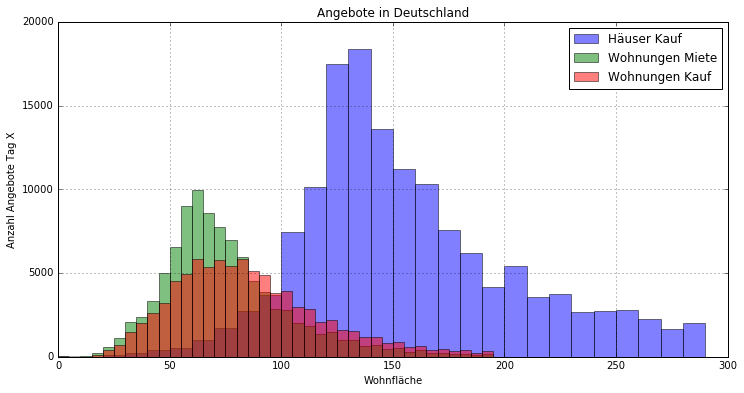

In [34]:
plt.figure(figsize=(12, 6))
# Hausflächen sind oft auf 10 gerundet, daher machen kleinere Bins keinen Sinn.
häuser.fläche.hist(bins=np.arange(0, 300, 10), label='Häuser Kauf', alpha = 0.5)
whg.fläche.hist(bins=np.arange(0, 200, 5), label='Wohnungen Miete', alpha = 0.5)
whgkauf.fläche.hist(bins=np.arange(0, 200, 5), label='Wohnungen Kauf', alpha = 0.5)
labels_für_angebote('Deutschland')

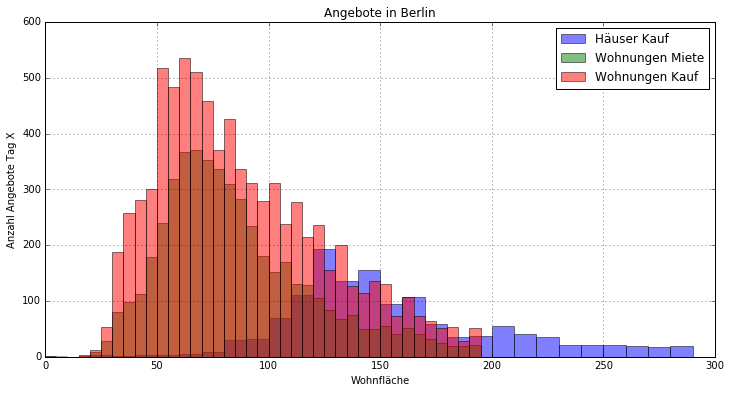

In [35]:
plt.figure(figsize=(12, 6))
häuser[häuser.kreis=='Berlin'].fläche.hist(bins=np.arange(0, 300, 10), label='Häuser Kauf', alpha = 0.5)
whg[whg.kreis=='Berlin'].fläche.hist(bins=np.arange(0, 200, 5), label='Wohnungen Miete', alpha = 0.5)
whgkauf[whgkauf.kreis=='Berlin'].fläche.hist(bins=np.arange(0, 200, 5), label='Wohnungen Kauf', alpha = 0.5)
labels_für_angebote('Berlin')

In [18]:
def plot_mean_rent_over_area(df, lbl, style=''):
    df.groupby(df.flächenkat).miete_qm.mean().plot(label=lbl, style=style)

def plot_by_no_rooms(df, line_style='-'):
    plot_mean_rent_over_area(df[(df.zimmer <  2) &                    (df.fläche <  70)], 'Ein Zimmer', 'r'+line_style)
    plot_mean_rent_over_area(df[(df.zimmer >= 2) & (df.zimmer <  3) & (df.fläche < 120)], 'Zwei Zimmer', 'm'+line_style)
    plot_mean_rent_over_area(df[(df.zimmer >= 3) & (df.zimmer <  4) & (df.fläche >  30)], 'Drei Zimmer', 'b'+line_style)
    plot_mean_rent_over_area(df[(df.zimmer >= 4) &                    (df.fläche >  30)], 'Vier und mehr Zimmer', 'k'+line_style)

    
def format_rent_plot():
    ax.legend()
    ax.set_yticks(np.arange(0, 20, 1), minor=True)                                           
    ax.set_xticks(np.arange(0, 200, 10), minor=True)  
    plt.xlabel("Wohnfläche")
    plt.ylabel("Miete pro qm")
    ax.grid(which='minor', alpha=0.5)  

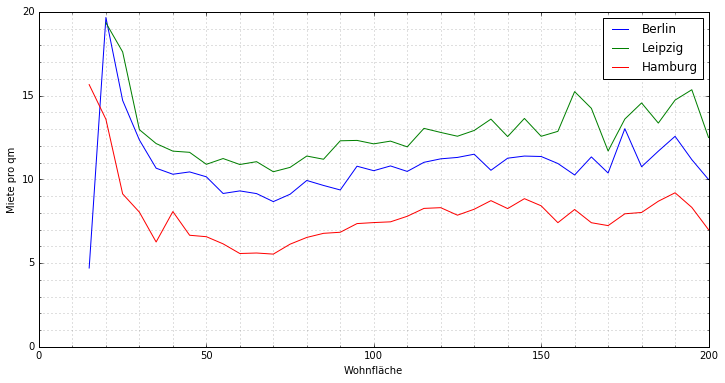

In [19]:
f, ax = plt.subplots(1, figsize=(12, 6))
plot_mean_rent_over_area(whg[whg.kreis=='Berlin'], 'Berlin')
plot_mean_rent_over_area(whg[whg.kreis=='Hamburg'], 'Leipzig')
plot_mean_rent_over_area(whg[whg.kreis=='Leipzig'], 'Hamburg')
format_rent_plot()

In [105]:
whg.zimmer.value_counts()

3.00     35413
2.00     30703
4.00     10875
1.00      7964
3.50      3800
2.50      3512
5.00      1975
1.50      1059
4.50       817
6.00       368
5.50       117
7.00        71
2.20        28
6.50        19
8.00        12
2.10         8
3.10         2
20.00        2
1.25         2
9.00         2
2.30         2
1.20         2
3.20         2
12.00        1
15.00        1
9.50         1
10.00        1
7.50         1
3.40         1
0.00         1
dtype: int64

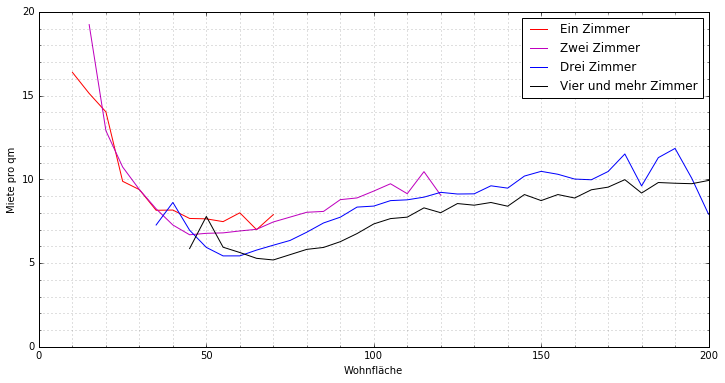

In [29]:
f, ax = plt.subplots(1, figsize=(12, 6))
plot_by_no_rooms(whg[whg.miete_qm > 3])  # remove some ridiculously cheap flats (those often have > 4 rooms)
format_rent_plot()

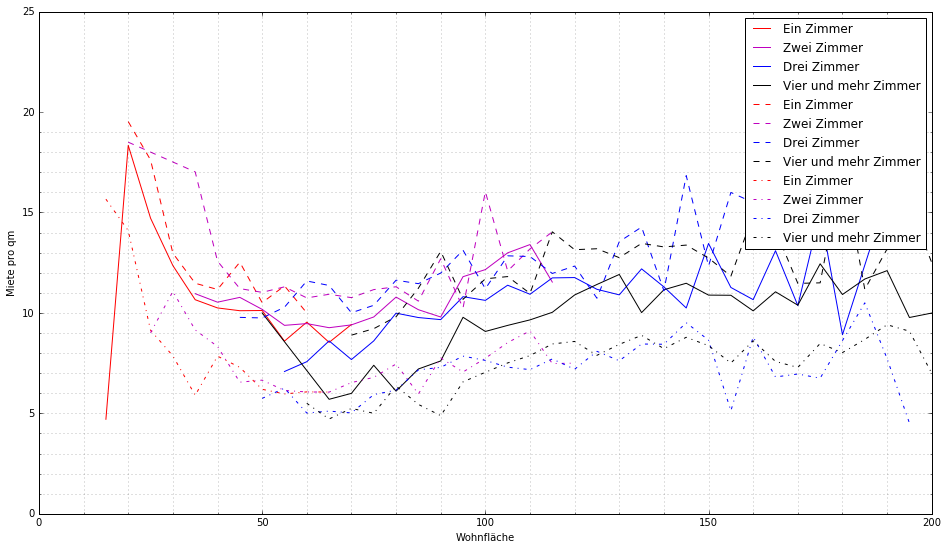

In [31]:
f, ax = plt.subplots(1, figsize=(16, 9))
plot_by_no_rooms(whg[whg.kreis=='Berlin'], '-')
plot_by_no_rooms(whg[whg.kreis=='Hamburg'], '--')
plot_by_no_rooms(whg[whg.kreis=='Leipzig'], '-.')
format_rent_plot()